## Тестовые задания_Аналитик

### Цель проекта:
Целью данного проекта является всесторонний анализ работы  комбайнов, изучение их эффективности, производительности и оценки урожайности сельскохозяйственных культур. 
### Задачи проекта:
**Подготовка данных к анализу.**

**Создание сводной таблицы:**
   - Построить сводную таблицу на основе исходных данных, где строки содержат информацию о группе полей и культивируемых культурах, а значения представляют собой общую массу убранного урожая.
   
**Вычисление показателя урожайности:**
   - Создайть дополнительное поле, которое отражает урожайность каждой сельскохозяйственной культуры в тоннах на гектар (т/га).
   
   
 **Подсчет продолжительности уборки:**
   - Добавьть дополнительный столбец, отражающий общее число дней, затраченных на уборку конкретной культуры.
  
   
 **Комплексный анализ работы техники:**
   - Оценить эффективность работы техники, проанализировав такие показатели, как выработка, производительность.

   
 **Визуализация результатов:**
   - Предоставить графическое представление данных, создав необходимые графики и диаграммы, иллюстрирующие связь между переменными исследования.


Загружаем библиотеки.

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загружаем данные, выводим первые 5 строк таблицы, знакомимся с данными.

In [112]:
file = pd.read_excel('/Users/tatanafomina/Downloads/Проверочные задания_Аналитик_ФИО.xlsx')
file.head()

,Группа полей,Поле,Дата работ,Культура,Смена,Вид работ,Комбайн,"Обработано, га","Убрано, тонн",Unnamed: 9,Перед Вами исходные данные (выгрузка) из 1С по работам на уборке зерновых и сахарной свёклы
0,Заря,ZAR-001,2024-09-01 00:00:00,Пшеница яровая,день,Уборка,Acros - 8562,24,102.720,NaN,Примечание:
1,Заря,ZAR-002,2024-09-02 00:00:00,Ячмень яровой,ночь,Уборка,Acros - 8562,20,80.000,NaN,"С выгрузкой можно работать, добавляя дополните..."
2,Заря,ZAR-004,2024-09-02 00:00:00,Сахарная свекла,ночь,Уборка,Ropa - 1387,11,495.000,NaN,NaN
3,Заря,ZAR-005,2024-09-05 00:00:00,Сахарная свекла,день,Уборка,Ropa - 1388,19,779.000,NaN,NaN
4,Заря,ZAR-003,2024-09-07 00:00:00,Соя,день,Уборка,Acros - 8563,27,30.263,NaN,NaN


In [113]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 11 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Группа полей                                                                                 49 non-null     object 
 1   Поле                                                                                         49 non-null     object 
 2   Дата работ                                                                                   49 non-null     object 
 3   Культура                                                                                     49 non-null     object 
 4   Смена                                                                                        49 non-null     object 
 5   Вид работ                             

In [114]:
file.describe(include = "all")

,Группа полей,Поле,Дата работ,Культура,Смена,Вид работ,Комбайн,"Обработано, га","Убрано, тонн",Unnamed: 9,Перед Вами исходные данные (выгрузка) из 1С по работам на уборке зерновых и сахарной свёклы
count,49,49,49,49,49,49,49,49.000000,49.000000,0.0,2
unique,3,20,17,6,2,1,7,NaN,NaN,NaN,2
top,Восход,VOS-006,2024-09-07 00:00:00,Сахарная свекла,день,Уборка,Acros - 8562,NaN,NaN,NaN,Примечание:
freq,21,4,6,22,35,49,10,NaN,NaN,NaN,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.265306,248.853903,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.599359,238.783176,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,19.148000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,57.600000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.000000,127.410000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,444.000000,NaN,NaN


Таблица "Проверочные задания_Аналитик_ФИО.xlsx" содержит  10 столбцов , 49 строк. Далеее проверим данные на пропуски, дубли, произведем очистку и поготовку к дальнейшему анализу.

Столбцы "Unnamed: 9" и "Перед Вами исходные данные (выгрузка) из 1С по работам на уборке зерновых и сахарной свёклы" нам не пригодятся для дальнейшего анализа, удалим их.

In [115]:
columns_to_drop = ['Unnamed: 9', 'Перед Вами исходные данные (выгрузка) из 1С по работам на уборке зерновых и сахарной свёклы']
file = file.drop(columns=columns_to_drop, errors='ignore')

В столбце 'Дата работ' тип данных изменим на формат datetime.

In [116]:
file['Дата работ'] = pd.to_datetime(file['Дата работ'], errors='coerce')


Посчитаем количество пропусков, проверим на дубли.

In [117]:
display('Количество пропусков', file.isnull().sum().to_frame())
#display('количество уникальных значений', file.nunique().to_frame())
file[file.duplicated()]

'Количество пропусков'

,0
Группа полей,0
Поле,0
Дата работ,0
Культура,0
Смена,0
Вид работ,0
Комбайн,0
"Обработано, га",0
"Убрано, тонн",0


,Группа полей,Поле,Дата работ,Культура,Смена,Вид работ,Комбайн,"Обработано, га","Убрано, тонн"


Пропуски и дубли не обнаружены.

Посмотрим на уникальные значения в столбцах.

In [118]:
def unique_values_in_columns(data):
    unique_values = {column: data[column].unique() for column in data.columns}
    for column, values in unique_values.items():
        print(f"Уникальные значения в столбце '{column}': {values}")
unique_values_in_columns(file)

Уникальные значения в столбце 'Группа полей': ['Заря' 'Восход' 'Рассвет']
Уникальные значения в столбце 'Поле': ['ZAR-001' 'ZAR-002' 'ZAR-004' 'ZAR-005' 'ZAR-003' 'VOS-001' 'VOS-002'
 'VOS-005' 'VOS-004' 'VOS-003' 'VOS-006' 'RAS-001' 'RAS-003' 'RAS-005'
 'RAS-006' 'RAS-007' 'ZAR-006' 'RAS-002' 'RAS-008' 'RAS-004']
Уникальные значения в столбце 'Дата работ': <DatetimeArray>
['2024-09-01 00:00:00', '2024-09-02 00:00:00', '2024-09-05 00:00:00',
 '2024-09-07 00:00:00', '2024-09-11 00:00:00', '2024-01-09 00:00:00',
 '2024-09-16 00:00:00', '2024-09-28 00:00:00', '2024-09-25 00:00:00',
 '2024-09-30 00:00:00', '2024-09-26 00:00:00', '2024-09-23 00:00:00',
 '2024-09-18 00:00:00', '2024-09-15 00:00:00', '2024-09-13 00:00:00',
 '2024-09-21 00:00:00']
Length: 16, dtype: datetime64[ns]
Уникальные значения в столбце 'Культура': ['Пшеница яровая' 'Ячмень  яровой' 'Сахарная свекла' 'Соя' 'Ячмень яровой'
 'Cоя']
Уникальные значения в столбце 'Смена': ['день' 'ночь']
Уникальные значения в столбце 'Вид р

В столбце 'Убрано, тонн' округлим значения до 2 знаков после запятой.

In [119]:
file['Убрано, тонн'] = file['Убрано, тонн'].round(2)
#file['Убрано, тонн']

В столбце 'Культура' приведем названия культур  единообразный и чистый вид перед дальнейшим анализом или агрегацией данных.

In [120]:
file['Культура'] = file['Культура'].str.lower() # приводим к нижнему регистру
file['Культура'] = file['Культура'].str.strip() #Убраем пробелы в начале и конце строки с помощью .str.strip()
file['Культура'] = file['Культура'].str.replace(r'\s+', ' ', regex=True)

mapping = {
    'cоя': 'соя' # Можно попробовать заменить латинскую с 
}
file['Культура'] = file['Культура'].replace(mapping) 

In [121]:
file['Культура'].unique()

array(['пшеница яровая', 'ячмень яровой', 'сахарная свекла', 'соя'],
      dtype=object)

In [122]:
#unique_values_in_columns(file)

Более наглядно отобразим уникальные значения в столбце 'Поле'. Убедимся, что названия полей, имеют единообразный вид.

In [123]:
sorted_values = sorted(file['Поле'].unique())
sorted_values

['RAS-001',
 'RAS-002',
 'RAS-003',
 'RAS-004',
 'RAS-005',
 'RAS-006',
 'RAS-007',
 'RAS-008',
 'VOS-001',
 'VOS-002',
 'VOS-003',
 'VOS-004',
 'VOS-005',
 'VOS-006',
 'ZAR-001',
 'ZAR-002',
 'ZAR-003',
 'ZAR-004',
 'ZAR-005',
 'ZAR-006']

Определим период проведения работ.

In [124]:
print('MIN значение Дата работ', file['Дата работ'].min())
print('MAX значение Дата работ', file['Дата работ'].max()) 

MIN значение Дата работ 2024-01-09 00:00:00
MAX значение Дата работ 2024-09-30 00:00:00


Скорректируем данные 

In [125]:
file.loc[file['Дата работ'] == '2024-01-09 00:00:00']
file.loc[file['Дата работ'] == '2024-01-09 00:00:00', 'Дата работ'] = '2024-09-01 00:00:00'

In [126]:
sorted(file['Дата работ'].unique())

[Timestamp('2024-09-01 00:00:00'),
 Timestamp('2024-09-02 00:00:00'),
 Timestamp('2024-09-05 00:00:00'),
 Timestamp('2024-09-07 00:00:00'),
 Timestamp('2024-09-11 00:00:00'),
 Timestamp('2024-09-13 00:00:00'),
 Timestamp('2024-09-15 00:00:00'),
 Timestamp('2024-09-16 00:00:00'),
 Timestamp('2024-09-18 00:00:00'),
 Timestamp('2024-09-21 00:00:00'),
 Timestamp('2024-09-23 00:00:00'),
 Timestamp('2024-09-25 00:00:00'),
 Timestamp('2024-09-26 00:00:00'),
 Timestamp('2024-09-28 00:00:00'),
 Timestamp('2024-09-30 00:00:00')]

In [127]:
print('MIN значение Дата работ', file['Дата работ'].min())
print('MAX значение Дата работ', file['Дата работ'].max()) 

MIN значение Дата работ 2024-09-01 00:00:00
MAX значение Дата работ 2024-09-30 00:00:00


Представлены данные за сентябрь 2024.

Посморим на изменения в датасете после очистки.

In [128]:
file[file.duplicated()]

,Группа полей,Поле,Дата работ,Культура,Смена,Вид работ,Комбайн,"Обработано, га","Убрано, тонн"


In [129]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Группа полей    49 non-null     object        
 1   Поле            49 non-null     object        
 2   Дата работ      49 non-null     datetime64[ns]
 3   Культура        49 non-null     object        
 4   Смена           49 non-null     object        
 5   Вид работ       49 non-null     object        
 6   Комбайн         49 non-null     object        
 7   Обработано, га  49 non-null     int64         
 8   Убрано, тонн    49 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 3.6+ KB


Мы  изучили данные, произвели очистку и подготовили данные для дальнейшего анализа.

### Задача 1.
										
1. Построить сводную таблицу на базе листа "исх. данные" в разрезе строк на группу полей и культуру. В разрезе значений на сумму убранного урожая.										
2. Создать вычисляемое поле с рассчетом урожайности культур (т/га)										
3. Сделать сортировку по убранному урожаю в порядке убывания.										
4. Добавить столбец с суммарным количеством дней уборки по каждой культуре.										
5. Описать на каких группах полей зерновые культуры имеют самую высокую урожайность.

In [130]:
agg_functions = {
    "Убрано, тонн": 'sum',
    "Обработано, га": 'sum',
    "Дата работ" : pd.Series.nunique
}

task1 = pd.pivot_table(file,
              index = ["Группа полей", "Культура"],                 
              values = ["Убрано, тонн", "Обработано, га", "Дата работ"],
            
              aggfunc=agg_functions,  
              fill_value=0
)

In [131]:
#task1

In [132]:
task1["Урожайность, т/га"] = (task1["Убрано, тонн"] / task1["Обработано, га"]).round(2)
task1 = task1.sort_values(by="Убрано, тонн", ascending=False)
task1.reset_index(inplace=True)

In [133]:
task1.rename(columns={'Дата работ': 'Количество дней'}, inplace=True)

In [134]:
task1

,Группа полей,Культура,Количество дней,"Обработано, га","Убрано, тонн","Урожайность, т/га"
0,Восход,сахарная свекла,6,144,4615.40,32.05
1,Заря,сахарная свекла,6,75,3429.00,45.72
2,Рассвет,сахарная свекла,3,59,2242.00,38.00
3,Восход,пшеница яровая,4,127,498.72,3.93
4,Рассвет,пшеница яровая,3,118,412.32,3.49
5,Рассвет,соя,5,144,247.43,1.72
6,Восход,ячмень яровой,3,83,232.10,2.80
7,Заря,ячмень яровой,2,39,157.90,4.05
8,Заря,пшеница яровая,2,34,137.82,4.05
9,Рассвет,ячмень яровой,2,34,112.82,3.32


In [135]:
sum_days_grain = pd.pivot_table(file,
              index = ["Культура"],                 
              values = ["Убрано, тонн", "Обработано, га", "Дата работ"],
              aggfunc=agg_functions, 
              fill_value=0
).reset_index()
sum_days_grain.rename(columns={'Дата работ': 'Количество дней'}, inplace=True)

In [136]:
sum_days_grain = sum_days_grain.sort_values(by="Убрано, тонн", ascending=False)
sum_days_grain

,Культура,Количество дней,"Обработано, га","Убрано, тонн"
1,сахарная свекла,11,278,10286.40
0,пшеница яровая,5,279,1048.86
3,ячмень яровой,4,156,502.82
2,соя,7,231,355.76


Функция для визуализации числовых значений, соответствующих высоте каждого столбца на графике.

In [137]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            
            if not np.isfinite(_x) or not np.isfinite(_y):
                continue  # Пропускаем некорректные координаты
                
            value = '{:.1f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center")
    
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

Визуализируем группу полей и культуру в разрезе значений урожайность, т/га.

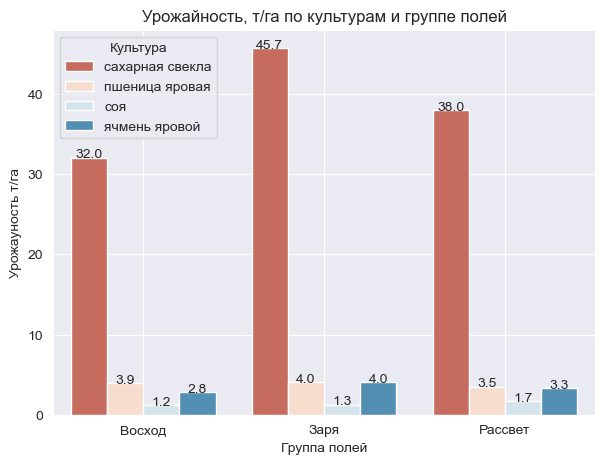

In [170]:
sns.set_style('dark')

plt.figure(figsize=(7, 5))
ax = sns.barplot(y = 'Урожайность, т/га', x='Группа полей', data=task1, hue='Культура', palette="RdBu")
plt.title('Урожайность, т/га по культурам и группе полей')
plt.ylabel('Урожауность т/га')
plt.xlabel('Группа полей')
plt.grid()
show_values_on_bars(ax)
plt.show()

Самая высокая урожайность сахарной свеклы на групппе полей Заря, у сои на группе полей Рассвет.
Группа полей Восход показывает самую низкую урожайность сахарной свеклы и сои.

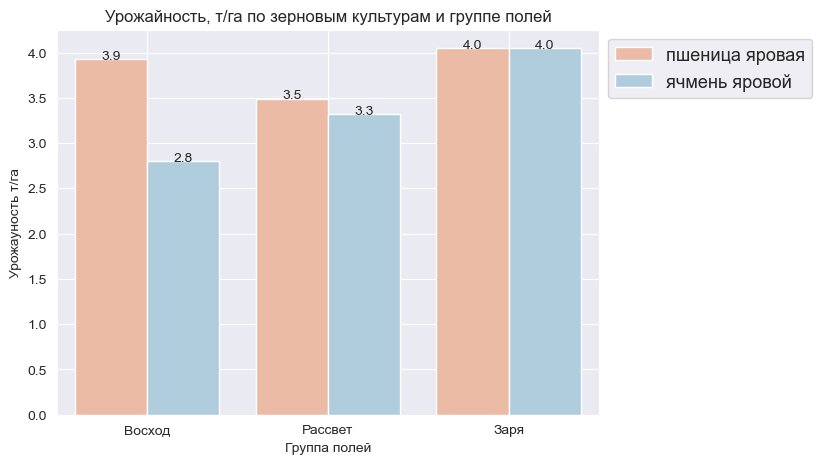

In [149]:
task1_1 = task1[task1['Культура'].isin(['пшеница яровая', 'ячмень яровой'])]
sns.set_style('dark')

plt.figure(figsize=(7, 5))
ax = sns.barplot(y = 'Урожайность, т/га', x='Группа полей', data=task1_1, hue='Культура', palette="RdBu")
plt.title('Урожайность, т/га по зерновым культурам и группе полей')
plt.ylabel('Урожауность т/га')
plt.xlabel('Группа полей')
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=13)
show_values_on_bars(ax)
plt.show()

На группах полей Заря зерновые культуры имеют самую высокую урожайность

### Задача 2.
1. Выполнить анализ работы комбайнов: эффективность работы техники, наработка, выработка и т.д.					
2. Написать выводы по сформированной аналитике.						
3. Визуализировать полученные результаты: графики, диаграммы и т.д.						

In [150]:
# Определяем типы комбайнов по их названию 
combine_type_mapping = {
    'Acros': 'Зерновые',
    'Ropa': 'Свекольные'
}
# Создаем столбец 'Тип комбайна' на основе названия
file['Тип комбайна'] = file['Комбайн'].apply(
    lambda x: combine_type_mapping.get(x.split(' - ')[0], 'Неизвестно')
)


In [151]:
file.head()

,Группа полей,Поле,Дата работ,Культура,Смена,Вид работ,Комбайн,"Обработано, га","Убрано, тонн",Тип комбайна
0,Заря,ZAR-001,2024-09-01,пшеница яровая,день,Уборка,Acros - 8562,24,102.72,Зерновые
1,Заря,ZAR-002,2024-09-02,ячмень яровой,ночь,Уборка,Acros - 8562,20,80.00,Зерновые
2,Заря,ZAR-004,2024-09-02,сахарная свекла,ночь,Уборка,Ropa - 1387,11,495.00,Свекольные
3,Заря,ZAR-005,2024-09-05,сахарная свекла,день,Уборка,Ropa - 1388,19,779.00,Свекольные
4,Заря,ZAR-003,2024-09-07,соя,день,Уборка,Acros - 8563,27,30.26,Зерновые


In [152]:
task2 = file.groupby(['Тип комбайна', 'Комбайн']).agg(
    Количество_смен=('Смена', 'count'),
    Суммарно_обработано_га=('Обработано, га', 'sum'),
    Суммарно_убрано_тонн=('Убрано, тонн', 'sum'),
).reset_index()
task2

,Тип комбайна,Комбайн,Количество_смен,Суммарно_обработано_га,Суммарно_убрано_тонн
0,Зерновые,Acros - 8562,10,257,779.80
1,Зерновые,Acros - 8563,10,235,578.91
2,Зерновые,Acros - 8564,7,174,548.73
3,Свекольные,Ropa - 1387,5,64,2589.40
4,Свекольные,Ropa - 1388,4,65,2065.00
5,Свекольные,Ropa - 1389,5,44,1674.50
6,Свекольные,Ropa - 1390,8,105,3957.50


In [153]:
# Расчет ключевых показателей эффективности (КПК)
task2['Средняя_выработка_на_га_(тонн/га)'] = (
    task2['Суммарно_убрано_тонн'] / task2['Суммарно_обработано_га']
)

# Расчет наработки (условно, если бы было время работы, мы бы использовали его;
# здесь используем количество записей как "количество смен/выходов")
task2['Наработка_смен'] = task2['Количество_смен']

In [154]:
# Расчет часовой выработки (предположим, что каждая запись - это условная смена,
# среднюю продолжительность которой примем за 10 часов для расчета скорости)
# В реальных данных здесь использовалось бы время работы!
task2['Условная_средняя_скорость_(га/смену)'] = (
    task2['Суммарно_обработано_га'] / task2['Наработка_смен']
).round(2)


# Переименование столбцов
task2.rename(columns={
    'Суммарно_обработано_га': 'Обработано, га',
    'Суммарно_убрано_тонн': 'Убрано, тонн',
}, inplace=True)

# Сортируем для наглядности (например, по общей выработке)
task2 = task2.sort_values(by='Убрано, тонн', ascending=False)
print('Результаты анализа работы комбайнов (по типу и единице):')
task2

Результаты анализа работы комбайнов (по типу и единице):


,Тип комбайна,Комбайн,Количество_смен,"Обработано, га","Убрано, тонн",Средняя_выработка_на_га_(тонн/га),Наработка_смен,Условная_средняя_скорость_(га/смену)
6,Свекольные,Ropa - 1390,8,105,3957.50,37.690476,8,13.12
3,Свекольные,Ropa - 1387,5,64,2589.40,40.459375,5,12.80
4,Свекольные,Ropa - 1388,4,65,2065.00,31.769231,4,16.25
5,Свекольные,Ropa - 1389,5,44,1674.50,38.056818,5,8.80
0,Зерновые,Acros - 8562,10,257,779.80,3.034241,10,25.70
1,Зерновые,Acros - 8563,10,235,578.91,2.463447,10,23.50
2,Зерновые,Acros - 8564,7,174,548.73,3.153621,7,24.86


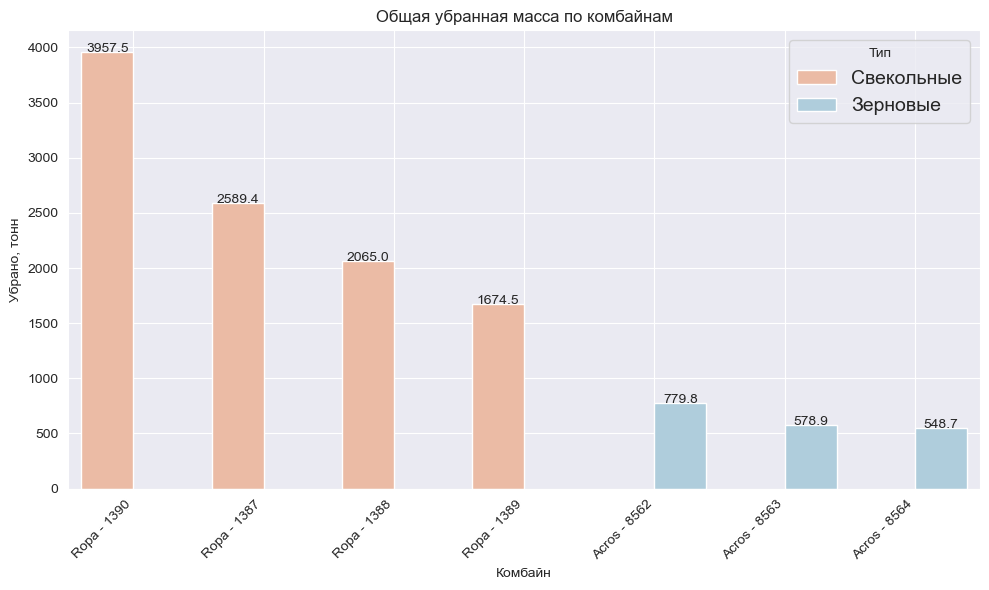

In [155]:
# Визуализация: Общая убранная масса по типам
sns.set_style('dark')

ax = plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=task2,
    x='Комбайн',
    y='Убрано, тонн',
    hue='Тип комбайна',
    palette="RdBu"
)

plt.title('Общая убранная масса по комбайнам')
plt.xlabel('Комбайн')
plt.ylabel('Убрано, тонн')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Тип', fontsize=14)
plt.grid()
plt.tight_layout()
show_values_on_bars(ax)
plt.show()

Среди лидеров по убранной массе Ropa 1390 и Acros 8562 в разрезе свекольные/зерновые.

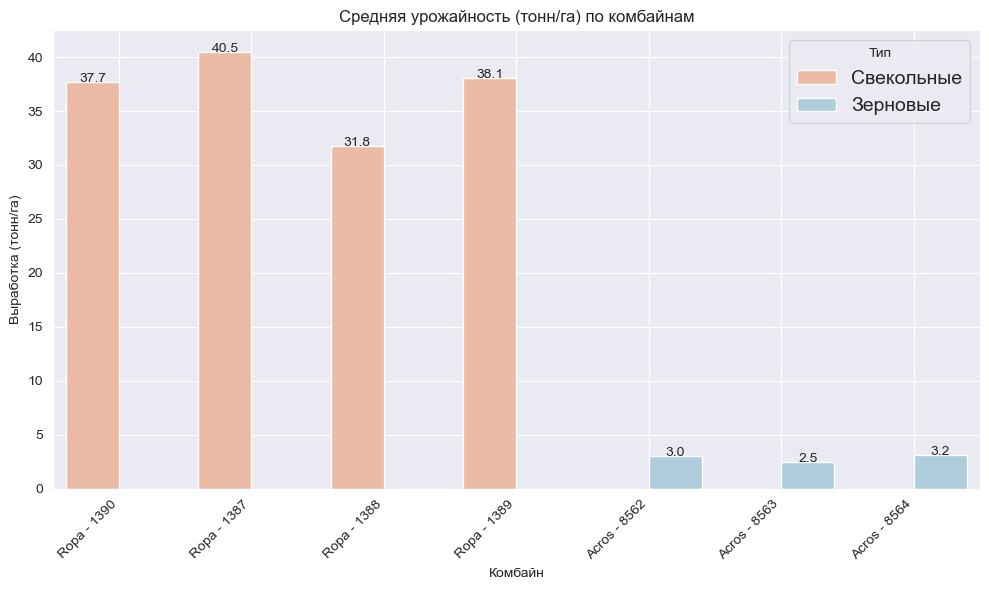

In [156]:
# Визуализация: Эффективность (Тонн/Га) по комбайнам
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=task2,
    x='Комбайн',
    y='Средняя_выработка_на_га_(тонн/га)',
    hue='Тип комбайна',
     palette="RdBu"
)
plt.title('Средняя урожайность (тонн/га) по комбайнам')
plt.xlabel('Комбайн')
plt.ylabel('Выработка (тонн/га)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Тип', fontsize=14)
plt.tight_layout()

plt.grid()
show_values_on_bars(ax)
plt.show()


Высокую среднюю урожайность показывают Ropa 1387 и Acros 8564 в разрезе свекольные/зерновые.

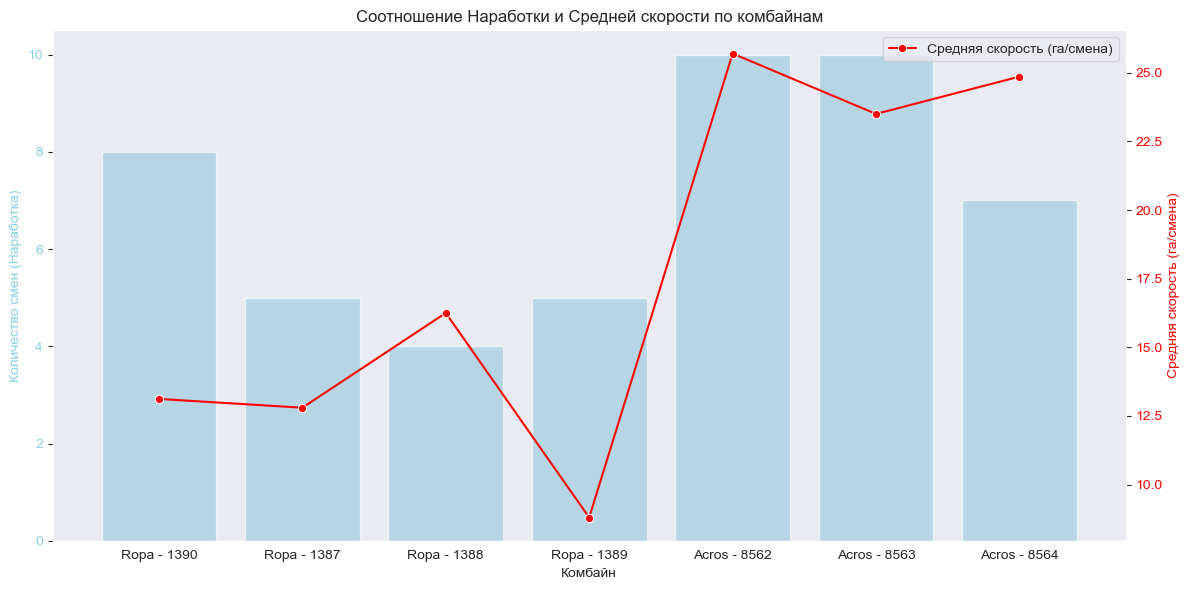

In [157]:
# Визуализация: Сравнение наработки и скорости (Га/Смена)
fig, ax1 = plt.subplots(figsize=(12, 6))

# График наработки (ЛК ось)
sns.barplot(x='Комбайн', y='Наработка_смен', data=task2, ax=ax1, color='skyblue', alpha=0.6, label='Кол-во смен')
ax1.set_ylabel('Количество смен (Наработка)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Вторичная ось для скорости
ax2 = ax1.twinx()
sns.lineplot(x='Комбайн', y='Условная_средняя_скорость_(га/смену)', data=task2, ax=ax2, marker='o', color='red', label='Средняя скорость (га/смена)')
ax2.set_ylabel('Средняя скорость (га/смена)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Соотношение Наработки и Средней скорости по комбайнам')
plt.xticks(rotation=45, ha='right')
fig.tight_layout()
plt.show()

Наработка vs Скорость: Комбинированный график отображает общую наработку (количество смен) и среднюю скорость обработки (га/смена) в виде линии. Это позволяет увидеть, влияние  объема работы на скорость выполнения.

Лидер по объему: Комбайны Ropa 1390 и Acros 8562 типа Зерновые/Свекольные собрали наибольшее количество тонн/обработал наибольшую площадь.
Самая высокая эффективность (тонн/га): Если Ropa - 1387 показывает значительно более высокий показатель тонн/га по сравнению с другими свекловичными машинами, это может указывать на то, что он работал на полях с более высокой урожайностью или имеет идеальную настройку для текущих условий.
Производительность по типу: Если комбайны типа "Свекольные" в среднем выполняют больший объем работы за смену (больше га/смена), чем "Зерновые", это логично, учитывая разную плотность и сложность сбора этих культур.


### Задача 3.
						
1. Выполнить анализ работы зерновых комбайнов: эффективность работы техники, наработка, выработка и т.д.		
2. Написать выводы по сформированной аналитике.						
3. Визуализировать полученные результаты: графики, диаграммы и т.д.						

In [166]:
task3 = file.groupby(['Культура', 'Комбайн']).agg(
    Общее_Обработанное_Га=('Обработано, га', 'sum'),
    Общий_Урожай_Тонн=('Убрано, тонн', 'sum'),
    Количество_Выездов=('Комбайн', 'count')
).reset_index()

# Сохраняем формулы
# Формула 1: Урожайность = Общий_Урожай_Тонн / Общее_Обработанное_Га
task3['Урожайность_Тонн_на_Га'] = (
    task3['Общий_Урожай_Тонн'] / task3['Общее_Обработанное_Га']
).round(2)

# Формула 2: Средняя выработка за выезд (скорость работы) = Общее_Обработанное_Га / Количество_Выездов
task3['Сред._Производительность_за_выезд_Га'] = (
    task3['Общее_Обработанное_Га'] / task3['Количество_Выездов']
).round(2)

# Переименовываем столбцы для ясности в отчете
task3.rename(columns={
    'Общее_Обработанное_Га': 'Наработка, Га',
    'Общий_Урожай_Тонн': 'Собранный урожай, т',
    'Количество_Выездов': 'Количество смен/выездов',
}, inplace=True)

print("Отчет по эффективности комбайнов по культурам")
task3

Отчет по эффективности комбайнов по культурам


,Культура,Комбайн,"Наработка, Га","Собранный урожай, т",Количество смен/выездов,Урожайность_Тонн_на_Га,Сред._Производительность_за_выезд_Га
0,пшеница яровая,Acros - 8562,141,483.03,5,3.43,28.20
1,пшеница яровая,Acros - 8563,73,285.42,3,3.91,24.33
2,пшеница яровая,Acros - 8564,65,280.41,2,4.31,32.50
3,сахарная свекла,Ropa - 1387,64,2589.40,5,40.46,12.80
4,сахарная свекла,Ropa - 1388,65,2065.00,4,31.77,16.25
5,сахарная свекла,Ropa - 1389,44,1674.50,5,38.06,8.80
6,сахарная свекла,Ropa - 1390,105,3957.50,8,37.69,13.12
7,соя,Acros - 8562,77,138.87,3,1.80,25.67
8,соя,Acros - 8563,122,166.59,5,1.37,24.40
9,соя,Acros - 8564,32,50.30,2,1.57,16.00


In [ ]:
#task3.info()

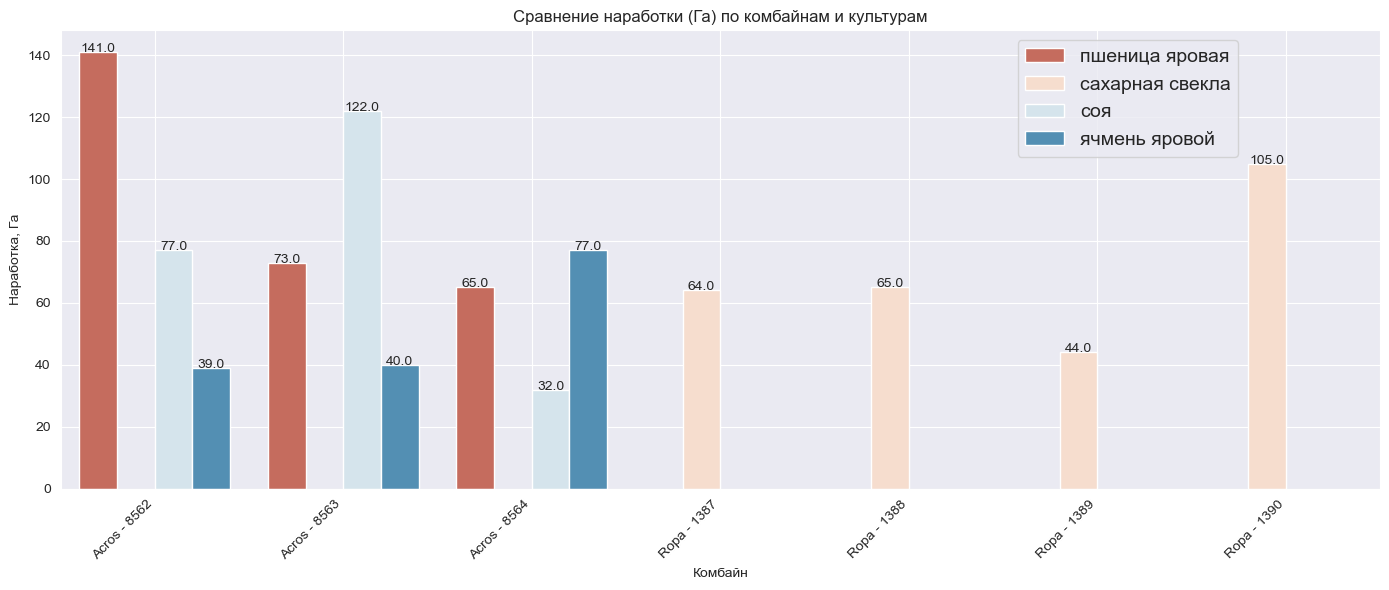

In [164]:
# Сравнение наработки (Га) по комбайнам для каждой культуры
ax = plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=task3,
    x='Комбайн',
    y='Наработка, Га',
    hue='Культура',
    palette="RdBu"
)
plt.title('Сравнение наработки (Га) по комбайнам и культурам')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
show_values_on_bars(ax)
plt.legend(loc='upper right', bbox_to_anchor=(0.9, 1.0), fontsize=14)
plt.grid()
plt.show()

Совокупная наработка техники (в гектарах) варьируется значительно между культурами. Комбайны группы Acros показали наибольшую суммарную наработку при уборке зерновых и бобовых, в то время как техника, задействованная на уборке сахарной свеклы, отработала меньшее общее количество гектаров.

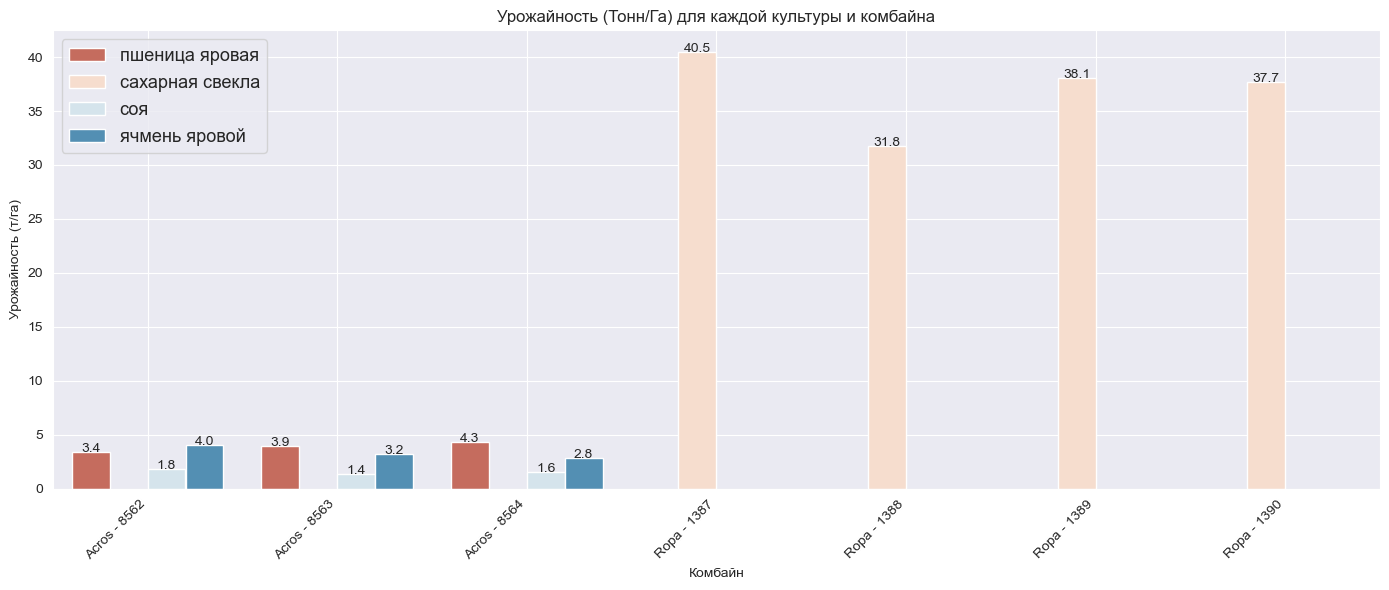

In [165]:
# Визуализация: Сравнение урожайности (Тонн/Га)
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=task3,
    x='Комбайн',
    y='Урожайность_Тонн_на_Га',
    hue='Культура',
    palette="RdBu",
 
    )
plt.title('Урожайность (Тонн/Га) для каждой культуры и комбайна')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Урожайность (т/га)')
plt.tight_layout()
plt.grid()
plt.legend( fontsize=13)
show_values_on_bars(ax)
plt.show()

Самая высокая фактическая урожайность (Тонн/Га) была зафиксирована при уборке сахарной свеклы, независимо от используемого комбайна.

Комбайн Ropa - 1387 демонстрирует наибольшую  урожайность при уборке сахарной свекла 40.5 т/га.
Наименьшая урожайность  наблюдалась при сборе сои комбайном Akros 8564 1.4 т/га.

Производительность (Га/выезд): Этот показатель отражает, насколько эффективно используется рабочая смена (выезд).
Комбайны Acros - 8564 и Ropa - 1387 показали наивысшую среднюю производительность за один выезд. Это может указывать на их техническую приспособленность или более оптимальное распределение рабочей нагрузки.

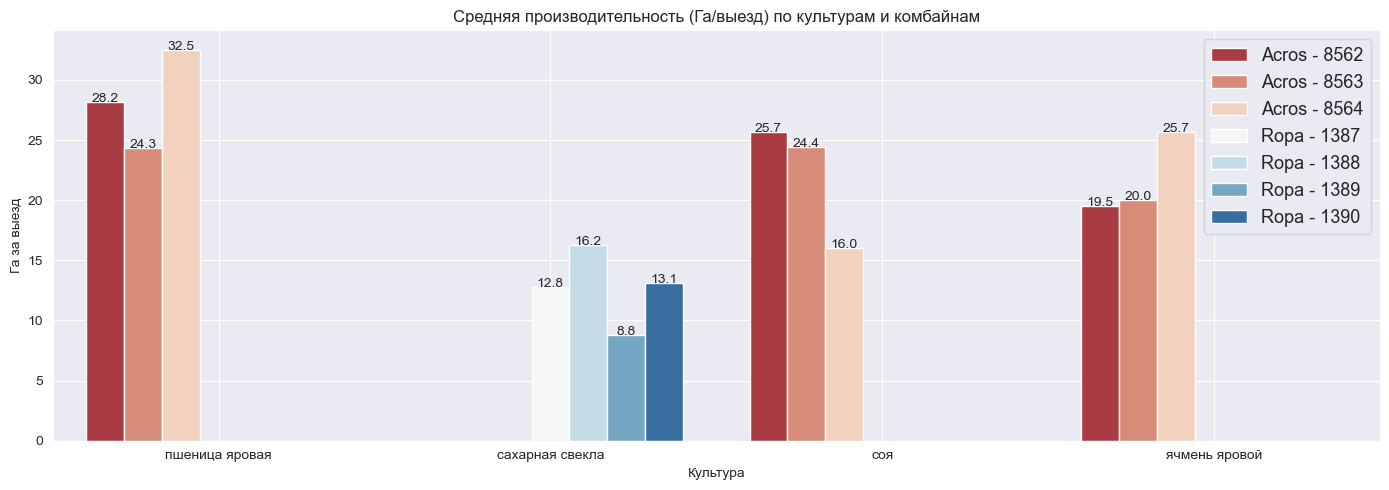

In [158]:
# Визуализация: Сравнение средней производительности (Га за выезд)
plt.figure(figsize=(14, 5))
ax = sns.barplot(
    data=task3,
    x='Культура',
    y='Сред._Производительность_за_выезд_Га',
    hue='Комбайн',
    palette="RdBu"
)
plt.title('Средняя производительность (Га/выезд) по культурам и комбайнам')
plt.ylabel('Га за выезд')
plt.xlabel('Культура')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid()
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), fontsize=13)
show_values_on_bars(ax)
plt.show()

Наибольшая средняя производительность (Га/выезд) наблюдается при уборке пшеницы яровой (максимум 32.5 Га/выезд) и сои (максимум 25.7 Га/выезд).
Наименьшая производительность зафиксирована при уборке сахарной свеклы (диапазон от 8.8 до 16.2 Га/выезд).
Наблюдается значительный разброс в производительности между разными комбайнами в рамках одной культуры, что указывает на разную эффективность техники.

### Задача 4.
1. К идентификатору культур в Таблицу 2 подтянуть название культуры и семейство из Таблицы 1.					
2. Если культура семейства "Кормовые", то в столбце "Классификатор" проставить значение "Класс 2". Во всех остальных случаях "Класс 1".										
3. Применить условное форматирование по правилу выделения ячеек к столбцу "Классификатор".										
Цвет на Ваше усмотрение, но ячейки с "Класс 1" должны быть отличны от "Класс 2".										

Так как задача подготовлена для выполения в Excel, адаптируем ее к  Jupiter.

In [159]:

data = {
    'Культура': [
        'Пшеница оз. / Blé d\'hiver', 'Пшеница яр. М. / Blé tendre', 'Пшеница яр. Т. / Blé dur',
        'Рожь оз. / Seigle d\'hiver', 'Горчица / Moutarde', 'Ячмень оз. / Orge d\'hiver',
        'Ячмень яр. / Orge de printemps', 'Кукуруза (зерн) / Maïs (grain)', 'Люпин / Lupin',
        'Вика яр. / Vesce de printemps', 'Соя / Soja', 'Подсолнечник / Tournesol',
        'Рапс оз. / Colza d\'hiver', 'Рапс яр. / Colza de printemps', 'Сах. свёкла / Betterave à sucre',
        'Кукуруза (силос) / Maïs (ensilage)', 'Люцерна / Luzerne', 'Горох / Petit pois',
        'Лён / Lin', 'Фацелия / Phacélie', 'Картофель / Pomme de terre'
    ],
    'Идентификатор культур': [
        354, 789, 965, 548, 123, 157, 785, 498, 455, 688, 951, 102, 108, 901, 708, 703, 534, 136, 207, 982, 311
    ],
    'Семейство': [
        'Зерновые', 'Зерновые', 'Зерновые', 'Зерновые', 'Масличные', 'Зерновые', 'Зерновые', 'Зерновые',
        'Кормовые', 'Кормовые', 'Бобовые', 'Масличные', 'Масличные', 'Масличные', 'Технические', 'Кормовые',
        'Кормовые', 'Бобовые', 'Масличные', 'Кормовые', 'Технические'
    ]
}

task4 = pd.DataFrame(data)

# Посмотрим первые пять записей нашего датасета
task4

,Культура,Идентификатор культур,Семейство
0,Пшеница оз. / Blé d'hiver,354,Зерновые
1,Пшеница яр. М. / Blé tendre,789,Зерновые
2,Пшеница яр. Т. / Blé dur,965,Зерновые
3,Рожь оз. / Seigle d'hiver,548,Зерновые
4,Горчица / Moutarde,123,Масличные
5,Ячмень оз. / Orge d'hiver,157,Зерновые
6,Ячмень яр. / Orge de printemps,785,Зерновые
7,Кукуруза (зерн) / Maïs (grain),498,Зерновые
8,Люпин / Lupin,455,Кормовые
9,Вика яр. / Vesce de printemps,688,Кормовые


In [160]:
# добавляем столбец "Классификатор"
task4['Классификатор'] = task4.apply(lambda row: 'Класс 2' if row['Семейство'] == 'Кормовые' else 'Класс 1', axis=1)

# Выделяем цвета ячеек
def highlight_class(row):
    color_map = {'Класс 1': 'background-color:#dff2bf;', 'Класс 2': 'background-color:#f8cecc;'}
    return [color_map[row['Классификатор']] if col == 'Классификатор' else '' for col in row.index]

task4 = task4.style.apply(highlight_class, axis=1)

task4

,Культура,Идентификатор культур,Семейство,Классификатор
0,Пшеница оз. / Blé d'hiver,354,Зерновые,Класс 1
1,Пшеница яр. М. / Blé tendre,789,Зерновые,Класс 1
2,Пшеница яр. Т. / Blé dur,965,Зерновые,Класс 1
3,Рожь оз. / Seigle d'hiver,548,Зерновые,Класс 1
4,Горчица / Moutarde,123,Масличные,Класс 1
5,Ячмень оз. / Orge d'hiver,157,Зерновые,Класс 1
6,Ячмень яр. / Orge de printemps,785,Зерновые,Класс 1
7,Кукуруза (зерн) / Maïs (grain),498,Зерновые,Класс 1
8,Люпин / Lupin,455,Кормовые,Класс 2
9,Вика яр. / Vesce de printemps,688,Кормовые,Класс 2


### Задача 5.
Вы сформировали посевной отчет по озимым культурам. У вас получились следующие данные.					
Опишите, что по Вашему мнению иллюстрирует полученная таблица и какие выводы можно сделать.					
				

In [161]:
df = {
    'Культура': ['Пшеница озимая', 'Ячмень озимый', 'Рапс озимый', 'Подсолнечник', 'Ячмень озимый'],
    'Вид работ': ['Сев с внесением удобрений'] * 5,
    'Дата работ': ['8/30/2023', '8/30/2023', '8/31/2023', '8/31/2023', '8/31/2023'],
    
    'План к севу, га': [14000, 2500, 3400, None, 7440],  # NULL-значение представлено как None
    'Факт сева, га': [14000, 2499, 3400, 1700, 7440],
    '% выполнения': ['100%', '100%', '100%', '', '100%']  # Пропущенное значение оставляем пустым
}
# Конвертируем данные в DataFrame
task5 = pd.DataFrame(df)
task5

,Культура,Вид работ,Дата работ,"План к севу, га","Факт сева, га",% выполнения
0,Пшеница озимая,Сев с внесением удобрений,8/30/2023,14000.0,14000,100%
1,Ячмень озимый,Сев с внесением удобрений,8/30/2023,2500.0,2499,100%
2,Рапс озимый,Сев с внесением удобрений,8/31/2023,3400.0,3400,100%
3,Подсолнечник,Сев с внесением удобрений,8/31/2023,NaN,1700,
4,Ячмень озимый,Сев с внесением удобрений,8/31/2023,7440.0,7440,100%


Анализ таблицы "Отчет о ходе выполнения плана по севу сельскохозяйственных культур на конец августа 2023 года".

Практически все культуры были посеяны в полном объёме («Пшеница озимая», «Ячмень озимый», «Рапс озимый»), достигнув показателя 100%. Однако стоит отметить незначительное отклонение по фактическому севу для второго участка «Ячмень озимый»: запланированные 2500 га фактически составили 2499 га, что практически соответствует плану.


Для Подсолнечника: (который обычно является яровой культурой, хотя дата сева 8/31 выглядит поздно для большинства регионов, где сеют подсолнечник) отсутствует плановый показатель (NaN), но факт сева составляет 1700 га. Это требует уточнения: либо план не был установлен, либо эти работы не были включены в общий оперативный план, либо это ошибка в данных.

Работы по севу велись активно в последние дни августа 2023 года.

Таблица показывает, что операции проводились последовательно и в установленные сроки, соответствующие сельскохозяйственному календарю. Все виды работ выполнялись одновременно с внесением удобрений, что положительно влияет на качество будущих урожаев.


Озимые культуры были успешно засеяны в запланированном объеме.
Небольшое расхождение между планируемым и фактическим показателем ("Ячмень озимый") незначительно и не оказывает существенного влияния на общий итог.
Для повышения точности отчёта рекомендуется устранить пробел в плане сева для подсолнечника и уточнить причину отсутствия показателя.
Таким образом, отчёт демонстрирует успешное выполнение агротехнических мероприятий по подготовке полей к предстоящему сезону, однако требует небольшой доработки для улучшения качества анализа.